### 手动实现

In [53]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

In [55]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为0.01
features, labels = arrayGenReg(delta=0.01)
# features是特征矩阵、labels为标签数组

In [56]:
# 判断是否可逆
np.linalg.det(features.T.dot(features))

np.float64(967456500.179829)

In [57]:
# 基础方法
w = np.linalg.inv(features.T.dot(features)) \
            .dot(features.T) \
            .dot(labels)
print(w)

# lstsq函数求解
w = np.linalg.lstsq(features, labels, rcond=-1)[0]

print(w)

[[ 1.99961892]
 [-0.99985281]
 [ 0.99970541]]
[[ 1.99961892]
 [-0.99985281]
 [ 0.99970541]]


In [58]:
SSELoss(features, w, labels)

array([[0.09300731]])

### 模型局限

#### 非线性相关规律

In [44]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为0.5
features, labels = arrayGenReg(w=[1,1], deg=3, delta=0.5)

In [45]:
features

array([[ 1.32921217,  1.        ],
       [-0.77003345,  1.        ],
       [-0.31628036,  1.        ],
       ...,
       [ 0.84682091,  1.        ],
       [ 1.73889649,  1.        ],
       [ 1.93991673,  1.        ]])

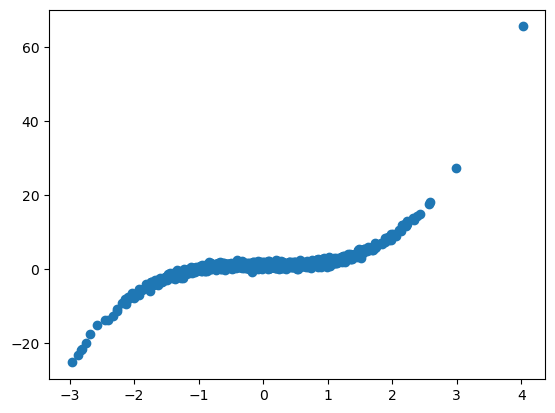

In [46]:
plt.plot(features[:, 0], labels, 'o')

In [47]:
# 最小二乘法模型参数求解
w = np.linalg.lstsq(features, labels, rcond=-1)[0]
w

array([[2.93885433],
       [0.96155715]])

In [48]:
loss = SSELoss(features, w, labels)[0][0]
loss

np.float64(7463.754135292741)

Text(0.5, 1.0, 'Loss = 7463.754135292741')

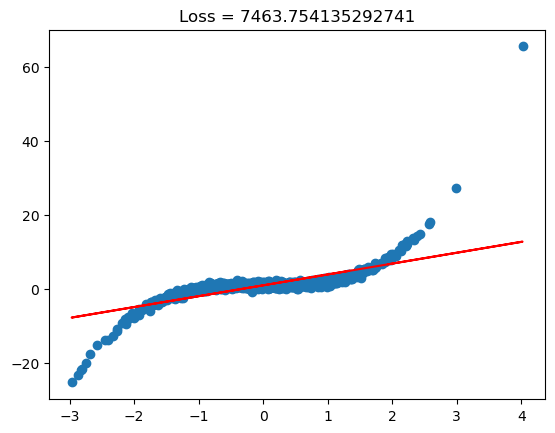

In [49]:
y_hat = features.dot(w)
plt.plot(features[:, 0], labels, 'o')
plt.plot(features[:, 0], y_hat, 'r-')
plt.title(f'Loss = {loss}')

#### 噪声增加

In [31]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为2
features, labels = arrayGenReg(w=[1,1], delta=2)

In [32]:
features

array([[ 1.32921217,  1.        ],
       [-0.77003345,  1.        ],
       [-0.31628036,  1.        ],
       ...,
       [ 0.84682091,  1.        ],
       [ 1.73889649,  1.        ],
       [ 1.93991673,  1.        ]])

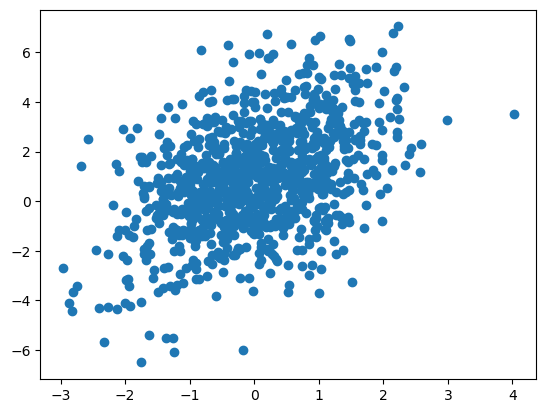

In [33]:
plt.plot(features[:, 0], labels, 'o')

In [34]:
w = np.linalg.lstsq(features, labels, rcond=-1)[0]
w

array([[0.91605821],
       [0.90602215]])

In [41]:
loss = SSELoss(features, w, labels)[0][0]
loss

np.float64(3767.1280435852773)

Text(0.5, 1.0, 'Loss = 3767.1280435852773')

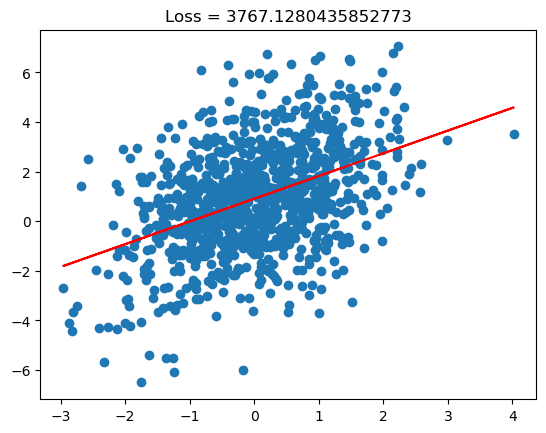

In [42]:
y_hat = features.dot(w)
plt.plot(features[:, 0], labels, 'o')
plt.plot(features[:, 0], y_hat, 'r-')
plt.title(f'Loss = {loss}')

### 决定系数

In [60]:
sst = np.power(labels.mean() - labels, 2).sum()
sse = SSELoss(features, w, labels)
r_sqr = 1-(sse/sst)
r_sqr

array([[0.99998114]])